<a href="https://colab.research.google.com/github/Mahak0602/Nexthikes-Project-6/blob/main/Nexthikes_p_6_Notebook_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM

#  Load and Prepare Data

In [ ]:
import pandas as pd
# Load data
df = pd.read_csv("/content/df (4).csv")

In [ ]:
df

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,DayOfYear,WeekOfYear,...,Promo2,StoreType,Assortment,Promo_SchoolHoliday,CompetitionDist_Bin,Sales,Month_real,Day_real,Month_int,Day_int
0,1,0.833333,1,0,1,2015,1,1,0.000000,0.0,...,0,1,0,0.0,2,5496.714153,1,1,1,1
1,751,1.000000,1,0,0,2015,1,1,0.021277,0.0,...,0,0,0,0.0,1,5838.223956,1,1,1,1
2,751,0.833333,1,0,0,2015,1,1,0.000000,0.0,...,0,0,0,0.0,1,5412.886643,1,1,1,1
3,750,1.000000,1,0,0,2015,1,1,0.021277,0.0,...,1,2,0,0.0,4,6233.051004,1,1,1,1
4,750,0.833333,1,0,0,2015,1,1,0.000000,0.0,...,1,2,0,0.0,4,4951.004031,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,717,0.500000,1,1,0,2015,12,17,1.000000,1.0,...,1,2,1,0.0,0,4114.579644,12,17,12,17
41084,716,0.500000,1,1,0,2015,12,17,1.000000,1.0,...,1,2,0,0.0,3,5353.508019,12,17,12,17
41085,714,0.500000,1,1,0,2015,12,17,1.000000,1.0,...,1,2,1,0.0,4,7202.215145,12,17,12,17
41086,677,0.500000,1,1,0,2015,12,17,1.000000,1.0,...,1,2,0,0.0,2,4202.113179,12,17,12,17


In [ ]:
import pandas as pd
import numpy as np

# Filter for a single store (e.g., Store 1)
df_store = df[df['Store'] == 1].copy()

# Ensure date index exists
df_store['Date'] = pd.to_datetime(dict(year=df_store['Year'].astype(int),
                                       month=df_store['Month_real'].astype(int),
                                       day=df_store['Day_real'].astype(int)), errors='coerce')
df_store.dropna(subset=['Date'], inplace=True)
df_store.set_index('Date', inplace=True)
df_store = df_store.sort_index()

# Select target and (optionally) features
data = df_store[['Sales']]


# Scale the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


# Create Supervised Sequences

In [ ]:
window_size = 7

In [ ]:
def create_sequences(data, window_size):
    X, y = [], []
    if len(data) <= window_size:
        print(f"Not enough data to create sequences with window size {window_size}")
        return np.array([]), np.array([])

    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)
X, y = create_sequences(scaled_data, window_size)
print("X shape:", X.shape)


X shape: (41, 7)


# Train/Test Split

In [ ]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build and Train LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential([
    LSTM(50, activation='relu', input_shape=(X.shape[1], 1)),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 361ms/step - loss: 0.2370 - val_loss: 0.2022
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.2249 - val_loss: 0.1910
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.2035 - val_loss: 0.1806
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.2018 - val_loss: 0.1706
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1841 - val_loss: 0.1607
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1734 - val_loss: 0.1507
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.1719 - val_loss: 0.1408
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.1600 - val_loss: 0.1309
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1456 - val_loss: 0.1207
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.1277 - val_loss: 0.1102
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1187 - val_loss: 0.0995
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 0.1136 - val_loss: 0.0890
Epoch 13/2

#  Forecast the Next Day

In [ ]:
last_window = scaled_data[-window_size:]
last_window = last_window.reshape((1, window_size, 1))
next_scaled = model.predict(last_window)
next_sales = scaler.inverse_transform(next_scaled)[0, 0]

print(f"📈 Forecasted next day's sales: {next_sales:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
📈 Forecasted next day's sales: 4789.74


# Evaluate and Plot

In [ ]:
history = model.fit(X, y, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - loss: 0.0634 - val_loss: 0.0493
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0645 - val_loss: 0.0497
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0767 - val_loss: 0.0486
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0685 - val_loss: 0.0473
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0685 - val_loss: 0.0459
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0567 - val_loss: 0.0452
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0545 - val_loss: 0.0454
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0595 - val_loss: 0.0460
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0612 - val_loss: 0.0466
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0608 - val_loss: 0.0471
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0535 - val_loss: 0.0473
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0618 - val_loss: 0.0473


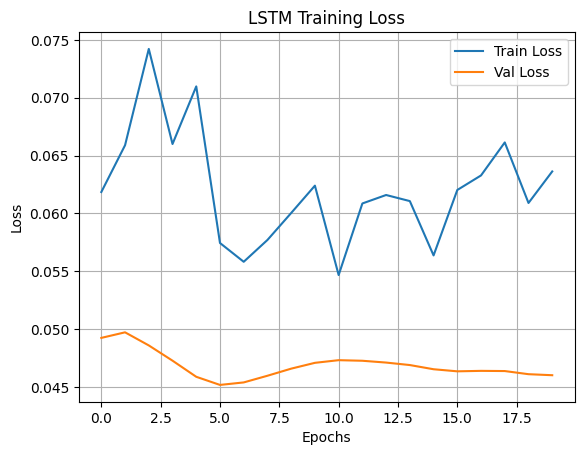

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("LSTM Training Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


# Save & Deploy

In [ ]:
# Save the trained LSTM model to an .h5 file
model.save("lstm_sales_model.h5")
print("✅ Model saved as 'lstm_sales_model.h5'")


✅ Model saved as 'lstm_sales_model.h5'


In [ ]:
model.save("lstm_sales_model.h5")
import pickle
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [ ]:
from tensorflow.keras.losses import MeanSquaredError

model.compile(optimizer='adam', loss=MeanSquaredError())


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
model.save("lstm_sales_model.h5")

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.0500 - val_loss: 0.0874
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - loss: 0.0635 - val_loss: 0.0964
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0609 - val_loss: 0.1020
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 0.0572 - val_loss: 0.1023
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.0540 - val_loss: 0.1022
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0637 - val_loss: 0.0995
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0549 - val_loss: 0.0949
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0657 - val_loss: 0.0901
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 0.0627 - val_loss: 0.0863
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 0.0543 - val_loss: 0.0838
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0553 - val_loss: 0.0824
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 0.0562 - val_loss: 0.0

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

# Load model and explicitly pass custom_objects if needed
loaded_model = load_model("lstm_sales_model.h5", custom_objects={'MeanSquaredError': MeanSquaredError})

print("✅ Model loaded successfully.")


✅ Model loaded successfully.


In [ ]:
df.to_csv('df.csv', index=False)